In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv]
!rm ~/.cache/matplotlib -rf

import pandas as pd
import matplotlib.pyplot as plt
# 한글 사용
plt.rc('font', family='NanumBarunGothic')

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
fc-cache: invalid option -- ']'
usage: fc-cache [-EfrsvVh] [-y SYSROOT] [--error-on-no-fonts] [--force|--really-force] [--sysroot=SYSROOT] [--system-only] [--verbose] [--version] [--help] [dirs]
Build font information caches in [dirs]
(all directories in font configuration by default).

  -E, --error-on-no-fonts  raise an error if no fonts in a directory
  -f, --force              scan directories with apparently valid caches
  -r, --really-force       erase all existing caches, then rescan
  -s, --system-only        scan system-wide directories only
  -y, --sysroot=SYSROOT    prepend SYSROOT to all paths for scanning
  -v, --verbose   

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
# 객실 등급에 따른 사망 생존 분포

# 1번 째 방법
df.groupby(['Pclass', 'Survived']).count()

temp = df.groupby(['Pclass', 'Survived']).count()['PassengerId']
temp = temp.reset_index()
temp

pivot_df = temp.pivot(index = 'Pclass', columns = 'Survived')
pivot_df.plot.bar(stacked = True, figsize=(10,7))
plt.show()

In [ ]:
# 두 번째 방법, 아주 유용
x = df[df['Survived'] == 0].groupby('Pclass').count()['PassengerId'].index.astype(str)
bottom = df[df['Survived'] == 0].groupby('Pclass').count()['PassengerId'].values
upper = df[df['Survived'] == 1].groupby('Pclass').count()['PassengerId'].values

plt.figure(dpi = 150)
plt.title('객실 등급에 따른 사망, 생존 분포')
plt.xlabel('객실등급')
plt.ylabel('사망, 생존 분포')

p1 = plt.bar(x, bottom)
p2 = plt.bar(x, upper, bottom = bottom)
plt.legend((p2, p1), ('생존', '사망'))

plt.show()

In [ ]:
# 칭호 (미스터, 미세스, 미스, ...)

df['Name'].loc[0].split(',')[1].split('.')[0]

def change_name(text:str):
  return text.split(',')[1].split('.')[0]

df['title'] = df['Name'].map(change_name)
df

In [ ]:
df.groupby(['title', 'Survived']).count()

df[df['Survived']==0].value_counts('title')[:4] # 개수 많은 상위 4개만
df[df['Survived']==1].value_counts('title')[df[df['Survived']==0].value_counts('title').index[:4]] # 뽑을 인덱스 고정 위해 슬라이싱 안에 idx 뽑는 코드 자체를 집어넣음. 아주 유용한 코드

In [ ]:
# 칭호에 따른 생존분포
x = df[df['Survived']==0].value_counts('title')[:4].reset_index
bottom = df[df['Survived']==0].value_counts('title')[:4].value_counts
upper = df[df['Survived']==1].value_counts('title')[df[df['Survived']==0].value_counts('title').index[:4]].value_counts

p1 = plt.bar(x, bottom)
p2 = plt.bar(x, upper, bottom = bottom)
plt.legend((p2,p1), ('생', '사'))

# map, apply는 병렬처리, 수행 속도 빨라.

In [ ]:
# 객실 등급에 따른 mr, mrs의 생존여부
df[(df['title' ==' Mr']) & (df['Survived']==1)].groupby('Pclass').count()['PassengerId']

In [ ]:
x = df[(df['title' ==' Mr']) & (df['Survived']==0)].groupby('Pclass').count()['PassengerId'].index.astype(str)
bottom = df[(df['title' ==' Mr']) & (df['Survived']==0)].groupby('Pclass').count()['PassengerId'].values
upper = df[(df['title' ==' Mr']) & (df['Survived']==1)].groupby('Pclass').count()['PassengerId'].value_counts
plt.title('객실 등급에 따른 Mr 사망 생존 분포')

p1 = plt.bar(x, bottom)
p2 = plt.bar(x, upper, bottom = bottom)
plt.legend((p2,p1), ('생', '사'))

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/데이콘/train.csv')
test = pd.read_csv('/content/drive/MyDrive/데이콘/test.csv')

In [ ]:
submission = pd.read_csv('/content/drive/MyDrive/데이콘/sample_submission.csv')

In [ ]:
submission['중식계'] = train['중식계'].mean()
submission['석식계'] = train['석식계'].mean()

In [ ]:
submission.to_csv('/content/drive/MyDrive/데이콘/sample_submission.csv', index = False)

In [ ]:
# 프로젝트 목적
# LH 구내식당 식사 계
# 뉴머리컬데이타
# 카테고리컬데이터
# 리그레션 ㄴ카테고리컬데이터일 때
# 분류 뉴머리컬일 때

# 메뉴 텍스트 마이닝???

# 메뉴 사용 안할거


# 모델링 프로세스

# 마련된 피쳐로 모델링
# 사이킷 런의 핏 함수
# 추론된 값으로 모델 검증



# 의사결정 나무

In [ ]:
# 구내식당 식수예측 2
train.columns

Index(['일자', '요일', '본사정원수', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수',
       '현본사소속재택근무자수', '조식메뉴', '중식메뉴', '석식메뉴', '중식계', '석식계'],
      dtype='object')

In [ ]:
# 1. 모델링
features = ['본사정원수', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수', '현본사소속재택근무자수']
X = train[features] # 변수가 여러개라 대문자
y = train['중식계']

In [ ]:
# 2. 모델 정의
from sklearn.tree import DecisionTreeRegressor
lunch_model = DecisionTreeRegressor()

In [ ]:
# 3. 모델 학습
lunch_model.fit(X,y) # 학습은 train, test로.

DecisionTreeRegressor()

In [ ]:
# 4. 예측
lunch_count_predict = lunch_model.predict(test[features])

lunch_count_predict

array([1254., 1096.,  573., 1233., 1038., 1173., 1054.,  642., 1019.,
       1114.,  720., 1252., 1202., 1254.,  791.,  627., 1202., 1202.,
        704.,  880.,  607., 1276.,  831.,  968.,  620., 1329., 1329.,
       1135., 1141.,  695., 1324., 1015., 1135.,  861.,  797., 1283.,
       1038.,  778.,  710.,  491., 1110., 1270.,  660.,  710.,  654.,
       1110., 1019.,  720., 1190.,  797.])

In [ ]:
pd.DataFrame(lunch_count_predict).head(1)

,0
0,1254.0


findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


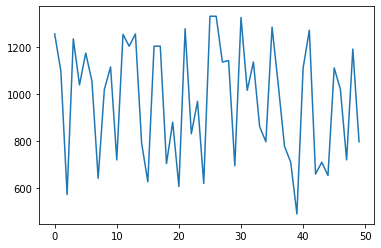

In [ ]:
# 5. 검증
plt.plot(lunch_count_predict)
plt.show()

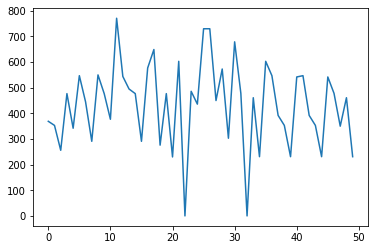

In [ ]:
X = train[features] # 변수가 여러개라 대문자
y = train['석식계']
dinner_model = DecisionTreeRegressor()
dinner_model.fit(X,y)
dinner_count_predict = dinner_model.predict(test[features])

plt.plot(dinner_count_predict)

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


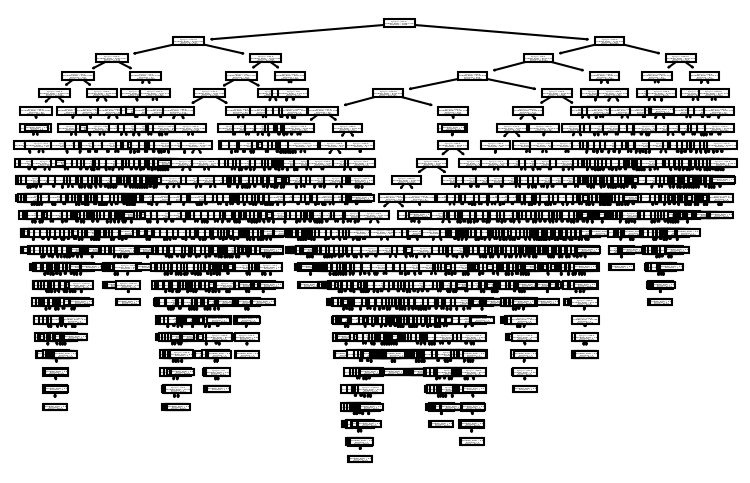

In [ ]:
from sklearn import tree
plt.figure(dpi = 150)
tree.plot_tree(dinner_model) # 모델 구조 시각화

# plt.savefig('이미지이름', dpi = 150)
plt.show()

In [ ]:
submission['중식계'] = lunch_count_predict
submission['석식계'] = dinner_count_predict
submission.to_csv('/content/drive/MyDrive/데이콘/submissionDT.csv', index = False) # mae 135점

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49885 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_

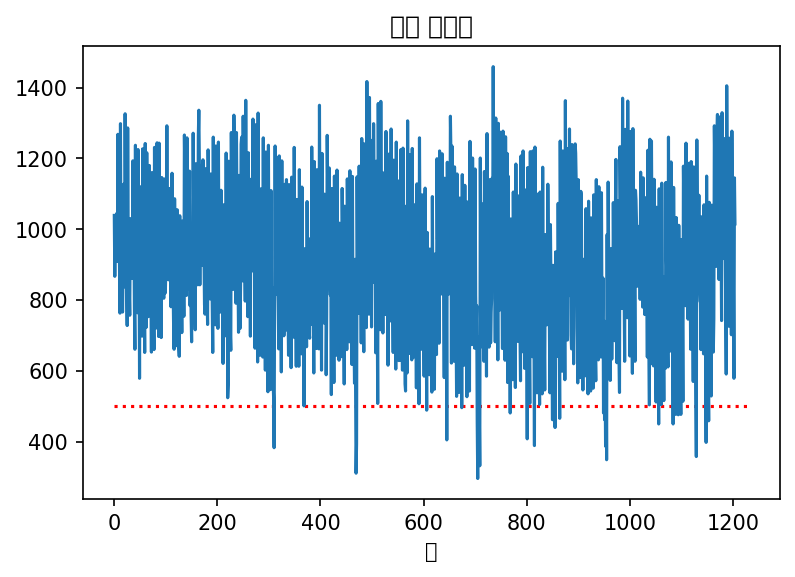

In [ ]:
# 식수예측 3. 탐색적 자료분석 EDA
# 시각화, 패턴, 인사이트 발굴
# 피쳐 엔지니어링

# 타겟 -> 피쳐 -> 타겟&피쳐 시각화


# 1. target을 주인공으로 한 EDA - 중식계

plt.figure(dpi = 150)
plt.title('일별 중식계')
plt.xlabel('일')
_ =plt.plot(train.index, train['중식계'])
_=plt.hlines(y=500, xmin = 0, xmax=1230, color = 'red', linestyle='dotted')
plt.show()

In [ ]:
train[train['중식계']<500] # 연휴 전 후 여부로도...

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
310,2017-05-04,목,2637,1224,41,45,0.0,모닝롤/단호박샌드 우유/주스 계란후라이 홍게살죽/쌀밥 (쌀:국내산) 시래기된장국 ...,쌀밥/잡곡밥 (쌀:국내산) 들깨미역국 닭갈비 생선까스*타르소스 무생채 포기김...,야채볶음밥 (쌀:국내산) 유부주머니국 미니버거 야채비빔만두 스틱단무지/오렌지주...,383.0,262.0
469,2017-12-28,목,2665,240,260,55,0.0,모닝롤/치즈프레즐 우유/주스 스크램블에그 견과류죽/쌀밥 (쌀:국내산) 피바지락국 ...,쌀밥/잡곡밥 (쌀:국내산) 아욱된장국 돼지갈비찜 콩나물겨자채 참나물무침 포기...,쌀밥/잡곡밥 (쌀:국내산) 옛날왕돈까스 크림스프 감자범벅/오이피클 과일샐러드 ...,311.0,245.0
470,2017-12-29,금,2665,489,242,5,0.0,모닝롤/크로와상 우유/주스 계란후라이 해물죽/쌀밥 (쌀:국내산) 냉이된장국 마늘...,쌀밥/잡곡밥 (쌀:국내산) 어묵국 닭볶음탕 연근땅콩조림 파래김*양념 배추겉절...,쌀밥/잡곡밥 (쌀:국내산) 육개장 자반고등어구이 비엔나감자볶음 청경채무침 포...,394.0,209.0
606,2018-07-20,금,2704,273,291,49,0.0,모닝롤/고구마파이 우유/주스 계란후라이 해물죽/쌀밥 (쌀:국내산) 대구찌개 오이...,쌀밥/잡곡밥 (쌀:국내산) 우무콩국 유자청제육볶음 통도라지구이 호박잎*양배추쌈...,쌀밥/잡곡밥 (쌀:국내산) 꽃게탕 돈육간장강정 두부구이 아몬드멸치볶음 포기김...,489.0,394.0
645,2018-09-14,금,2763,174,313,132,0.0,모닝롤/크로와상 우유/주스 계란후라이 해물죽/쌀밥 (쌀:국내산) 선지해장국 멸치...,쌀밥/잡곡밥 (쌀:국내산) 고추장찌개 언양식불고기 계란말이 상추파무침 포기김...,쌀밥/잡곡밥 (쌀:국내산) 도토리묵냉국 해물누룽지탕 동그랑땡전 도라지무침 포...,405.0,375.0
674,2018-11-09,금,2815,185,302,38,0.0,모닝롤/꿀호떡 우유/주스 계란후라이 홍게살죽/쌀밥 (쌀:국내산) 근대국 카레감자...,쌀밥/잡곡밥 (쌀:국내산) 육개장 고등어구이 비엔나케찹볶음 연근조림 포기김치...,쌀밥/잡곡밥 (쌀:국내산) 콩비지찌개 쇠고기장조림 메밀전병만두 오이무침 포기...,496.0,454.0
704,2018-12-21,금,2846,175,261,163,0.0,모닝롤/단팥빵 우유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 북어계란국 톳두...,쌀밥/잡곡밥 (쌀:국내산) 닭개장 갈치양념조림 고기전 비트무생채 포기김치 (...,쌀밥/잡곡밥 (쌀:국내산) 쇠고기미역국 생선까스*탈탈소스 마파두부 콩나물무침 ...,456.0,456.0
705,2018-12-24,월,2846,894,159,26,0.0,모닝롤/프렌치토스트 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 콩나물김치국...,쌀밥/잡곡밥 (쌀:국내산) 열무된장국 훈제오리구이 매운어묵볶음 쌈무/부추생채 ...,쌀밥/잡곡밥 (쌀:국내산) 민물새우찌개 닭갈비 버섯잡채 오이무침 포기김치 (...,296.0,104.0
708,2018-12-28,금,2846,315,264,18,0.0,모닝롤/카스텔라 우유/주스 계란후라이 양송이죽/쌀밥 (쌀:국내산) 대구매운탕 검...,쌀밥/잡곡밥 (쌀:국내산) 고추장찌개 버섯불고기 해물동그랑땡 유채나물 포기김...,쌀밥/잡곡밥 (쌀:국내산) 육개장 코다리조림 꽃맛살볶음 견과류조림 포기김치 ...,491.0,406.0
709,2018-12-31,월,2846,1085,132,28,0.0,모닝롤/마늘빵 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 된장찌개 단배추...,쌀밥/잡곡밥 (쌀:국내산) 콩나물국 돈육고추장불고기 (돼지고기:국내산) 감자채볶음...,쌀밥/잡곡밥 (쌀:국내산) 들깨시래기국 훈제오리볶음 계란찜 참나물생채 포기김...,332.0,135.0


In [ ]:
train[train['중식계']<500]['본사휴가자수'].mean()
train[train['중식계']>=500]['본사휴가자수'].mean()

149.21325403568395

In [ ]:
# 예측할 수 있는 이상치 = 특이값

x = ['중식<500', '중식>=500']
y [train[train['중식계']<500]['본사휴가자수'].mean(),train[train['중식계']>=500]['본사휴가자수'].mean()]

plt.figure(dpi=150)
plt.title('중식계 vs 휴가자수')

plt.bar(x,y)
plt.show()

KeyError: ignored

Text(0.5, 1.0, '석식계')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49437 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49885 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49437 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49885 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text

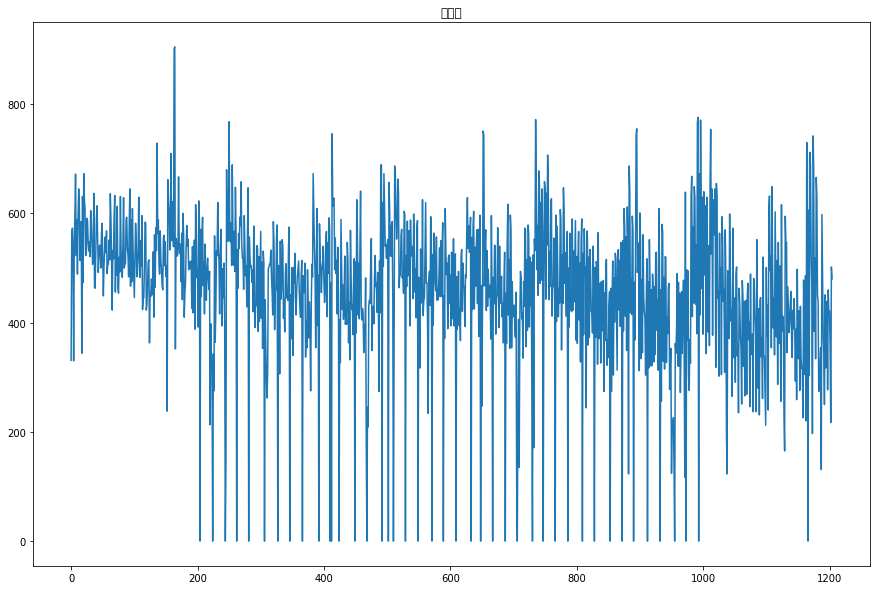

In [ ]:
# 석식계 target EDA

train['석식계'].plot(figsize=(15,10))
plt.title('석식계')
# 규칙적인 이상치

In [ ]:
train[train['석식계'] == 0] # 이상치 발생 원인: 자기 계발의 날

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
204,2016-11-30,수,2689,68,207,0,0.0,모닝롤/카스텔라 우유/주스 스크램블에그 누룽지탕/쌀밥 (쌀:국내산) 고추장찌개 ...,나물비빔밥 (쌀:국내산) 가쯔오장국 치킨핑거*요거트D 감자샐러드 오복지무침 ...,*,1109.0,0.0
224,2016-12-28,수,2705,166,225,0,0.0,모닝롤/고구마파이 우유/주스 스크램블에그 누룽지탕/쌀밥 (쌀:국내산) 북어계란국 ...,콩나물밥 (쌀:국내산) 가쯔오장국 미트볼케찹조림 꽃맛살샐러드 군고구마 배추겉...,*,767.0,0.0
244,2017-01-25,수,2697,79,203,0,0.0,모닝롤/토마토샌드 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 두부젓국찌개 ...,카레덮밥 (쌀:국내산) 맑은국 유린기 개성감자만두 오이사과무침 포기김치 (김...,*,720.0,0.0
262,2017-02-22,수,2632,75,252,0,0.0,모닝롤/브라우니 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 꽃게탕 명엽채...,나물비빔밥 (쌀:국내산) 유부장국 생선까스*탈탈소스 파스타샐러드 마늘쫑볶음 ...,*,1065.0,0.0
281,2017-03-22,수,2627,53,235,0,0.0,모닝롤/찐빵 우유/주스 계란후라이 김치죽/쌀밥 (쌀:국내산) 콩나물국 김실파무침...,쌀밥/잡곡밥 (쌀:국내산) 돈육김치찌개 유린기 비엔나볶음 세발나물 깍두기 (...,*,953.0,0.0
306,2017-04-26,수,2626,45,304,0,0.0,모닝롤/와플 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 된장찌개 검정콩조...,비빔밥 (쌀:국내산) 맑은국 오징어튀김 견과류조림 하와이안샐러드 깍두기 (김...,*,835.0,0.0
327,2017-05-31,수,2637,43,265,0,0.0,모닝롤/베이글 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 두부젓국찌개 자...,열무보리비빔밥 (쌀:국내산) 가쯔오장국 탕수만두 콥샐러드 오이지무침 포기김치...,자기계발의날,910.0,0.0
346,2017-06-28,수,2648,58,259,0,0.0,모닝롤/단팥빵 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 쇠고기매운국 고...,콩나물밥 (쌀:국내산) 얼갈이된장국 삼치구이 잡채 아삭고추무침 깍두기 (김치...,*자기계발의날*,745.0,0.0
366,2017-07-26,수,2839,254,246,0,0.0,모닝롤/단팥빵 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 민물새우찌개 숙...,나물비빔밥 미소장국 파스타샐러드 소세지오븐구이 오렌지 포기김치 (김치:국내산),가정의날,797.0,0.0
392,2017-09-01,금,2642,177,303,45,0.0,모닝롤/단팥빵 우유/주스 계란후라이 단호박죽/쌀밥 (쌀:국내산) 대구찌개 깻순나...,쌀밥/잡곡밥 (쌀:국내산) 시래기국 훈제오리구이 두부구이*양념장 쌈무/양파절임...,*,663.0,0.0


In [ ]:
# 위 그래프를 통해 3~7월 사이에 석식계 지속적 감소함을 확인

# 월
train['일자'].loc[0][5:7]

def month(text:str):
  return text[5:7]

train['월'] = train['일자'].map(month)
train

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,월
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0,02
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0,02
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0,02
3,2016-02-04,목,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0,02
4,2016-02-05,금,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0,02
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,2021-01-20,수,2983,75,198,4,391.0,모닝롤/페퍼로니피자 우유/주스 계란후라이/찐계란 크루통크림스프/흑미밥 아귀지리 마늘...,쌀밥/흑미밥/찰현미밥 아욱국 수제함박스테이크 견과류마카로니범벅 생깻잎지 단호박물김치...,김치볶음밥 미니쫄우동*맛살튀김 브로콜리깨소스무침 계란후라이 고들빼기무침 겉절이김치,1093.0,421.0,01
1201,2021-01-21,목,2983,92,231,462,351.0,모닝롤/생크림단팥빵 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 떡국 해물땡굴소스볶...,쌀밥/수수밥/찰현미밥 냉이된장국 동파육 봄동전 청경채/버섯숙회*초장 무생채 양상추샐...,흑미밥 쇠고기무국 삼치양념구이 비엔나채소볶음 숙주나물당근무침 포기김치,832.0,353.0,01
1202,2021-01-22,금,2983,255,248,1,303.0,모닝롤/BLT샌드위치 우유/주스 계란후라이/찐계란 흑임자죽/흑미밥 바지락살국 두부조...,전주비빔밥*약고추장 계란파국 요거닭 올방개묵무침 파프리카해초무침 포기김치 양상추샐러...,흑미밥 수제비국 수제맛쵸킹탕수육 유부채소겨자냉채 참나물무침 갓김치/겉절이김치,579.0,217.0,01
1203,2021-01-25,월,2983,107,153,616,327.0,모닝롤/호박고구마오븐구이 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 감자양파국 분...,쌀밥/흑미밥/찰현미밥 전주식콩나물해장국 돈육간장불고기 깐풍연근 연두부*달래양념장 봄...,흑미밥 열무된장국 장어강정*데리야끼소스 깻잎쌈*생강채 오이선 포기김치,1145.0,502.0,01


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0, flags=flags)


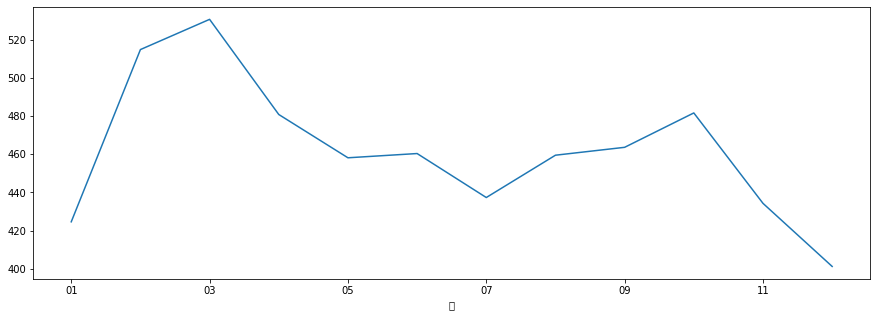

In [ ]:
train.groupby('월').mean()['석식계'].plot(figsize = (15,5))

In [ ]:
train['일자'].loc[0][:7]
def month(text:str):
  return text[:7]
train['월'] = train['일자'].map(month)
train

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,월
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0,2016-02
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0,2016-02
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0,2016-02
3,2016-02-04,목,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0,2016-02
4,2016-02-05,금,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0,2016-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,2021-01-20,수,2983,75,198,4,391.0,모닝롤/페퍼로니피자 우유/주스 계란후라이/찐계란 크루통크림스프/흑미밥 아귀지리 마늘...,쌀밥/흑미밥/찰현미밥 아욱국 수제함박스테이크 견과류마카로니범벅 생깻잎지 단호박물김치...,김치볶음밥 미니쫄우동*맛살튀김 브로콜리깨소스무침 계란후라이 고들빼기무침 겉절이김치,1093.0,421.0,2021-01
1201,2021-01-21,목,2983,92,231,462,351.0,모닝롤/생크림단팥빵 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 떡국 해물땡굴소스볶...,쌀밥/수수밥/찰현미밥 냉이된장국 동파육 봄동전 청경채/버섯숙회*초장 무생채 양상추샐...,흑미밥 쇠고기무국 삼치양념구이 비엔나채소볶음 숙주나물당근무침 포기김치,832.0,353.0,2021-01
1202,2021-01-22,금,2983,255,248,1,303.0,모닝롤/BLT샌드위치 우유/주스 계란후라이/찐계란 흑임자죽/흑미밥 바지락살국 두부조...,전주비빔밥*약고추장 계란파국 요거닭 올방개묵무침 파프리카해초무침 포기김치 양상추샐러...,흑미밥 수제비국 수제맛쵸킹탕수육 유부채소겨자냉채 참나물무침 갓김치/겉절이김치,579.0,217.0,2021-01
1203,2021-01-25,월,2983,107,153,616,327.0,모닝롤/호박고구마오븐구이 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 감자양파국 분...,쌀밥/흑미밥/찰현미밥 전주식콩나물해장국 돈육간장불고기 깐풍연근 연두부*달래양념장 봄...,흑미밥 열무된장국 장어강정*데리야끼소스 깻잎쌈*생강채 오이선 포기김치,1145.0,502.0,2021-01


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0, flags=flags)


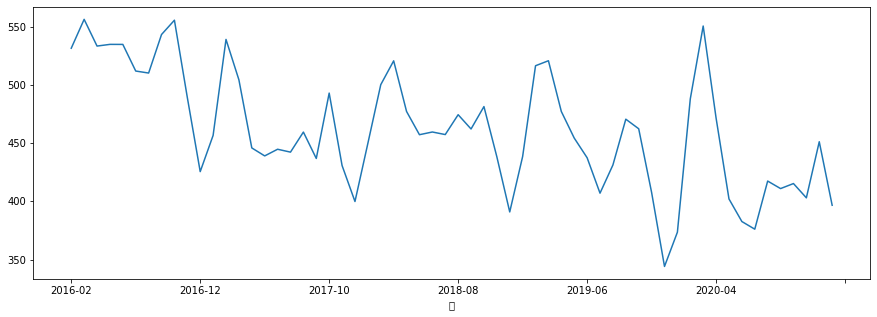

In [ ]:
train.groupby('월').mean()['석식계'].plot(figsize = (15,5))

In [ ]:
# 3월, 10월 석식계가 다른 달보다 많다는 인사이트.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49437 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49885 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49437 missing from current font.
  font.set_te

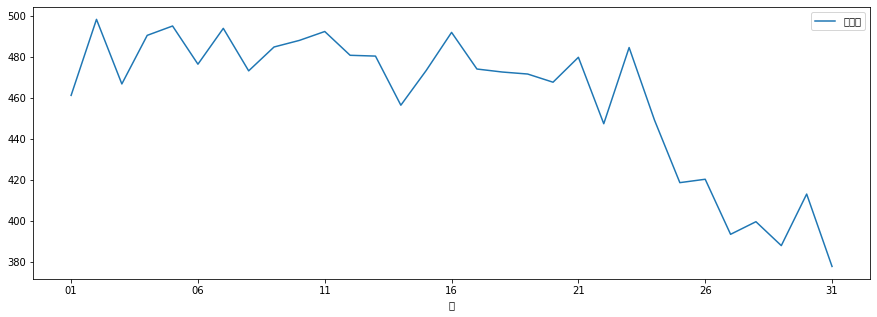

In [ ]:
# 일별 ==> 월말 월초 패턴 확인 위해

def day(text:str):
  return text[8:]

train['일'] = train['일자'].map(day)

train.groupby('일').mean()[['석식계']].plot(figsize = (15,5)) # 각괄호 2번 쓰는 이유는 범례위해

In [ ]:
############ target을 이용한 시각화 끝

In [ ]:
train.groupby('요일').mean()['석식계']

요일
금    404.979253
목    480.401639
수    363.615063
월    538.933610
화    520.129167
Name: 석식계, dtype: float64

In [ ]:
# Target을 주인공으로 한 시각화 (주인공 == y축)
# Feature을 주인공으로 한 시각화
# 월, 일, 요일별 분포
# Target 이상치
# 예측할 수 없는 이상치는 모델 성능을 위해 제거해야함.

In [ ]:
# feature engineering
# train set의 이상치 제거 (왜냐면 testset엔 자기 계발의 날에 대한 정보가 없어서.)

train = train[train['석식계'] != 0]

def month(text:str):
  return int(text[5:7])

train['월'] = train['일자'].map(month)

def month(text:str):
  return int(text[8:])

train['일'] = train['일자'].map(day)

# 월별 일별 패턴이 있었으므로 따로 열 만드는 것.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
train.loc[train['요일'] == '월', '요일'] = 1
train.loc[train['요일'] == '화', '요일'] = 2
train.loc[train['요일'] == '수', '요일'] = 3
train.loc[train['요일'] == '목', '요일'] = 4
train.loc[train['요일'] == '금', '요일'] = 5

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
train['요일'].unique()

array([1, 2, 3, 4, 5], dtype=object)

In [ ]:
# 모델링
features = ['요일', '월', '일', '본사정원수', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수','현본사소속재택근무자수']
X = train[features]
y = train['중식계']

# 2 모델정의
lunch_model = DecisionTreeRegressor()

# 모델학습
lunch_model.fit(X, y)

# 4 예측
lunch_count_predict = lunch_model.predict(test[features])



X = train[features]
y = train['석식계']

# 2 모델정의
dinner_model = DecisionTreeRegressor()

# 모델학습
dinner_model.fit(X, y)

# 4 예측
dinner_count_predict = dinner_model.predict(test[features])

KeyError: ignored

In [ ]:
submission['중식계'] = lunch_count_predict
submission['석식계'] = dinner_count_predict
submission.to_csv('피쳐추가 DT 예측.csv', index = False)